# Habreman's Survival DataSet Analysis

Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

https://www.kaggle.com/gilsousa/habermans-survival-data-set

# Column Information: 
* Age of patient at time of operation
* Patient's year of operation (year - 1900)
* Number of positive axillary nodes detected
* Survival status (class attribute) 
    * 1 = the patient survived 5 years or longer 
    * 2 = the patient died within 5 year

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('haberman.csv' , names=['age' , 'op_yr' , 'node' , 'status'])

In [3]:
# Data points and features
print(data.shape)

(306, 4)


In [4]:
# column names
print(data.columns)

Index(['age', 'op_yr', 'node', 'status'], dtype='object')


# Features:
1. age
2. operation year
3. number of positive auxillary nodes

# class label:
* Survival status:
    * 1 = the patient survived 5 years or longer 
    * 2 = the patient died within 5 year

In [5]:
# Data Points for each class

print(data['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


## OBJECTIVE:
Given a Dataset we want to build a model that predicts if a patient survives for more than 5 years after operation or not.

# Univarient Analysis

PDF(Probability Density Function)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

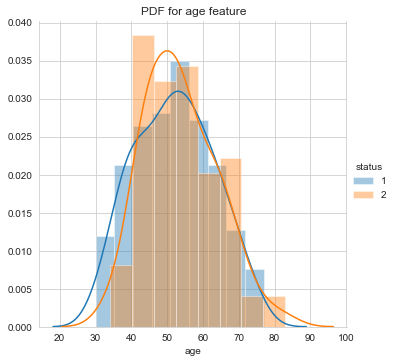

In [36]:
sns.FacetGrid(data , hue='status' , height=5)\
.map(sns.distplot , 'age')\
.add_legend();
plt.title("PDF for age feature");
plt.show()

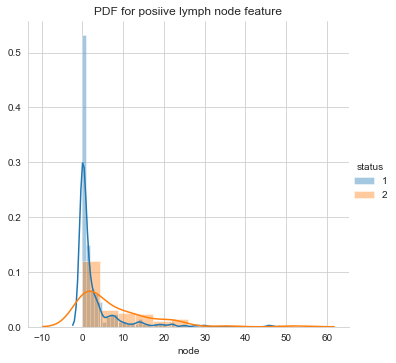

In [38]:
sns.FacetGrid(data , hue='status' , height=5)\
.map(sns.distplot , 'node')\
.add_legend();
plt.title("PDF for posiive lymph node feature");
plt.show()

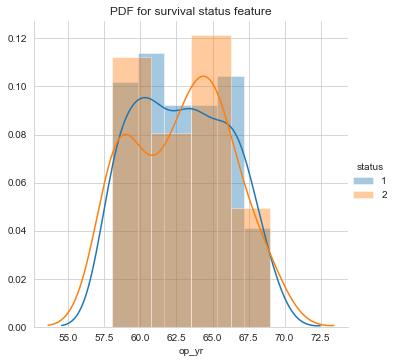

In [40]:
sns.FacetGrid(data , hue='status' , height=5)\
.map(sns.distplot , 'op_yr')\
.add_legend();
plt.title("PDF for survival status feature");
plt.show()

# CDF(Cumulative Distribution Function)

In [10]:
import numpy as np

In [11]:
# separating classes
cls1 = data.loc[data['status'] == 1]
cls2 = data.loc[data['status'] == 2]

In [12]:
print("Patients Survived 5 years or longer")
print(cls1.describe())

Patients Survived 5 years or longer
              age       op_yr        node  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0


PDF [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bin Edges [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


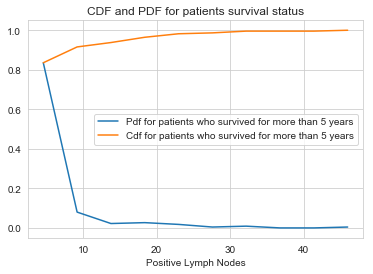

In [41]:
counts , bin_edges = np.histogram(cls1['node'] , bins=10 , density=True)
pdf = counts/sum(counts)
print("PDF" , pdf)
print ("Bin Edges" , bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] , pdf)
plt.plot(bin_edges[1:] , cdf)
plt.legend(['Pdf for patients who survived for more than 5 years',
            'Cdf for patients who survived for more than 5 years'])
plt.xlabel("Positive Lymph Nodes")
plt.title("CDF and PDF for patients survival status");
plt.show()

PDF [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bin Edges [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


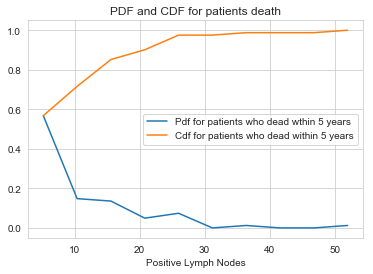

In [42]:
counts , bin_edges = np.histogram(cls2['node'] , bins=10 , density=True)
pdf = counts/sum(counts)
print("PDF" , pdf)
print ("Bin Edges" , bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] , pdf)
plt.plot(bin_edges[1:] , cdf)
plt.legend(['Pdf for patients who dead wthin 5 years',
            'Cdf for patients who dead within 5 years'])
plt.xlabel("Positive Lymph Nodes");
plt.title("PDF and CDF for patients death");
plt.show()

# Boxplot

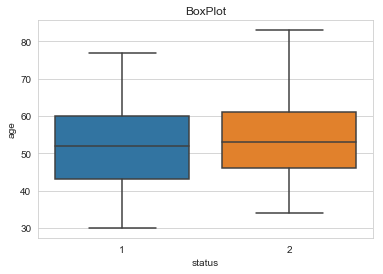

In [43]:
sns.boxplot(x='status',y='age', data=data);
plt.title("BoxPlot")
plt.show()

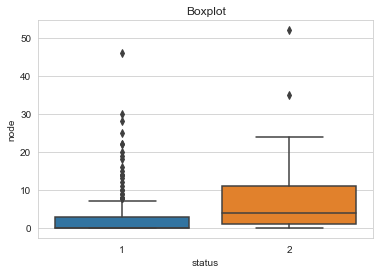

In [44]:
sns.boxplot(x='status',y='node', data=data );
plt.title("Boxplot")
plt.show()

# violin Plots

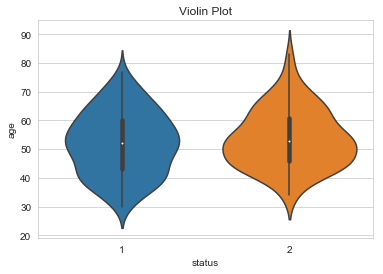

In [46]:
sns.violinplot(x="status", y="age", data=data , size=10);
plt.title("Violin Plot");
plt.show()

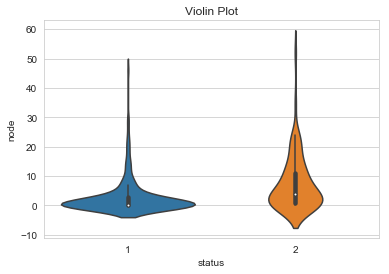

In [48]:
sns.violinplot(x="status", y="node", data=data , size=10)
plt.title("Violin Plot");
plt.show()

In [120]:
# number of patients with less positive nodes
len(cls1[cls1['node'] == 0])

117

In [121]:
# number of patients with less positive nodes
len(cls2[cls2['node'] == 0])

19

In [122]:
print("Patient survived more than 5 years")
print(cls1.describe())
print("Patient survived less than 5 years")
print(cls2.describe())

Patient survived more than 5 years
              age       op_yr        node  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0
Patient survived less than 5 years
             age      op_yr       node  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69.000000  52.000000     2.0


# Observations:
* From above observation we can predict that the above Dataset is imbalance DataSet.
* 26% of patients died with in 5 year
* 74% of patients survived 5 year or longer
* The year of operations has no effect on patient survival hence this feature has no significance
* patient below age 34 were all survived more than 5 years
* patient age greater than 77 survived less than 5 years
* survival chances of patient with less or zero auxillary nodes are high

# Bi-Varient Analysis

# Scatter Plots 

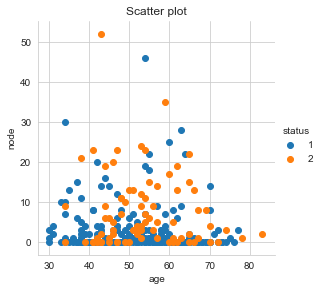

In [49]:
sns.FacetGrid(data, hue="status", height=4) \
   .map(plt.scatter, "age", "node") \
   .add_legend();
plt.title("Scatter plot");
plt.show();

# Pair Plots

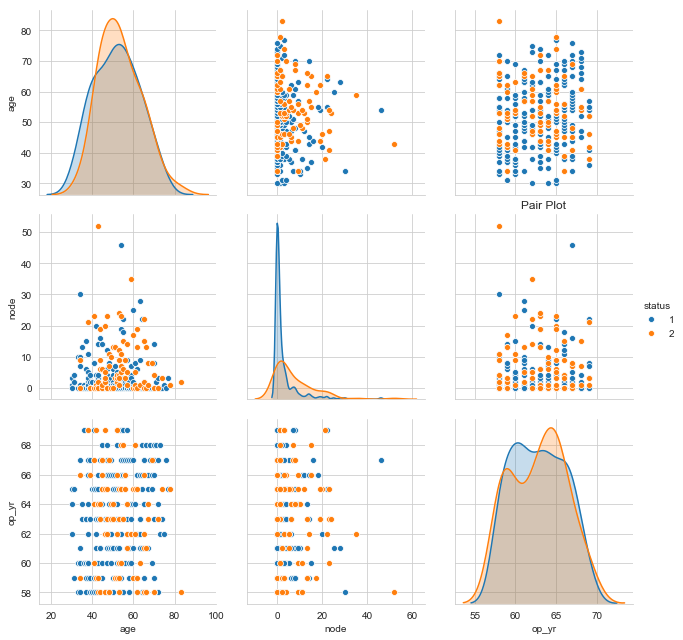

In [51]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data, hue="status", vars=['age' , 'node' , 'op_yr'] , height=3);
plt.title("Pair Plot");
plt.show();

# Observation
* It looks like we cannot distinguish the data easily with the help of above scalar plots as most of them are overlapping.